In [1]:
from igraph import *
from scipy.signal import savgol_filter
from topoSort import *
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import pickle as pkl
    
def getIkFromCount(allCount,kRange,d,offset):
    completeness = [100.0*x/d for x in kRange]
    Ik = np.mean(np.log2(allCount),axis=0)
    Ik = [offset - x for x in Ik]
    return [completeness,Ik]

In [2]:
seed = range(1000,2000)
num_nodes = 10
num_edges = range(5,46)
# num_topo_all = pkl.load(open("N%d-rep%d.pkl" %(num_nodes,len(seed))))
num_topo_all = exp(seed,num_nodes,num_edges)

Seed=1000
Seed=1001
Seed=1002
Seed=1003
Seed=1004
Seed=1005
Seed=1006
Seed=1007
Seed=1008
Seed=1009
Seed=1010
Seed=1011
Seed=1012
Seed=1013
Seed=1014
Seed=1015
Seed=1016
Seed=1017
Seed=1018
Seed=1019
Seed=1020
Seed=1021
Seed=1022
Seed=1023
Seed=1024
Seed=1025
Seed=1026
Seed=1027
Seed=1028
Seed=1029
Seed=1030
Seed=1031
Seed=1032
Seed=1033
Seed=1034
Seed=1035
Seed=1036
Seed=1037
Seed=1038
Seed=1039
Seed=1040
Seed=1041
Seed=1042
Seed=1043
Seed=1044
Seed=1045
Seed=1046
Seed=1047
Seed=1048
Seed=1049
Seed=1050
Seed=1051
Seed=1052
Seed=1053
Seed=1054
Seed=1055
Seed=1056
Seed=1057
Seed=1058
Seed=1059
Seed=1060
Seed=1061
Seed=1062
Seed=1063
Seed=1064
Seed=1065
Seed=1066
Seed=1067
Seed=1068
Seed=1069
Seed=1070
Seed=1071
Seed=1072
Seed=1073
Seed=1074
Seed=1075
Seed=1076
Seed=1077
Seed=1078
Seed=1079
Seed=1080
Seed=1081
Seed=1082
Seed=1083
Seed=1084
Seed=1085
Seed=1086
Seed=1087
Seed=1088
Seed=1089
Seed=1090
Seed=1091
Seed=1092
Seed=1093
Seed=1094
Seed=1095
Seed=1096
Seed=1097
Seed=1098
Seed=1099


Seed=1820
Seed=1821
Seed=1822
Seed=1823
Seed=1824
Seed=1825
Seed=1826
Seed=1827
Seed=1828
Seed=1829
Seed=1830
Seed=1831
Seed=1832
Seed=1833
Seed=1834
Seed=1835
Seed=1836
Seed=1837
Seed=1838
Seed=1839
Seed=1840
Seed=1841
Seed=1842
Seed=1843
Seed=1844
Seed=1845
Seed=1846
Seed=1847
Seed=1848
Seed=1849
Seed=1850
Seed=1851
Seed=1852
Seed=1853
Seed=1854
Seed=1855
Seed=1856
Seed=1857
Seed=1858
Seed=1859
Seed=1860
Seed=1861
Seed=1862
Seed=1863
Seed=1864
Seed=1865
Seed=1866
Seed=1867
Seed=1868
Seed=1869
Seed=1870
Seed=1871
Seed=1872
Seed=1873
Seed=1874
Seed=1875
Seed=1876
Seed=1877
Seed=1878
Seed=1879
Seed=1880
Seed=1881
Seed=1882
Seed=1883
Seed=1884
Seed=1885
Seed=1886
Seed=1887
Seed=1888
Seed=1889
Seed=1890
Seed=1891
Seed=1892
Seed=1893
Seed=1894
Seed=1895
Seed=1896
Seed=1897
Seed=1898
Seed=1899
Seed=1900
Seed=1901
Seed=1902
Seed=1903
Seed=1904
Seed=1905
Seed=1906
Seed=1907
Seed=1908
Seed=1909
Seed=1910
Seed=1911
Seed=1912
Seed=1913
Seed=1914
Seed=1915
Seed=1916
Seed=1917
Seed=1918
Seed=1919


In [3]:
# pkl.dump(num_topo_all,open("N%d-rep%d.pkl" %(num_nodes,len(seed)),"wb"))
pkl.dump(num_topo_all,open("N10-rep2000.pkl","wb"))

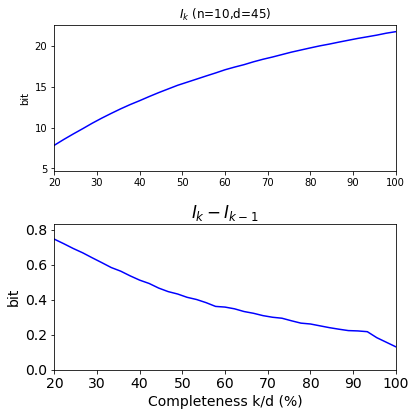

In [4]:
plt.figure(figsize=(6,6))
plt.subplot(211)
offset = np.log2(math.factorial(num_nodes))
d = num_nodes*(num_nodes-1)/2
[completeness,Ik] = getIkFromCount(num_topo_all,[x+1 for x in num_edges],d,offset)
# plt.plot(completeness,Ik,'b+')
plt.plot(completeness,savgol_filter(Ik,3,2),'b-')
plt.title("$I_k$ (n=%d,d=%d)" % (num_nodes,d))
plt.ylabel("bit")
plt.rcParams.update({'font.size':14})
# plt.ylim(ymax=14)
plt.xlim((20,100))
plt.tight_layout()
          
plt.subplot(212)
x2plot = completeness[1:]
y2plot = np.diff(Ik)
# plt.plot(x2plot,y2plot,'b+')
plt.plot(x2plot,savgol_filter(y2plot,7,1),'b-')
plt.xlabel("Completeness k/d (%)")
plt.ylabel("bit")
plt.title("$I_{k}-I_{k-1}$")
plt.rcParams.update({'font.size':14})
plt.ylim(ymin=0)
plt.xlim((20,100))
plt.tight_layout()

plt.savefig("N%d-rep%d.pdf" %(num_nodes,len(seed)))
plt.show()

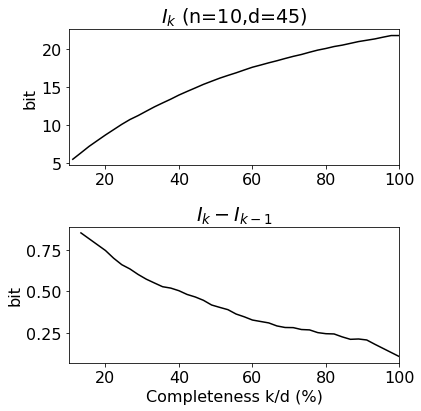

In [21]:
plt.figure(figsize=(6,6))
plt.subplot(211)
#plt.errorbar(x=[2.0*e/num_nodes/(num_nodes-1)*100 for e in num_edges],y=np.mean(num_topo_all,axis=0)/10000, yerr=np.std(num_topo_all,axis=0)/10000)
x2plot = [2.0*e/num_nodes/(num_nodes-1)*100 for e in num_edges]
y2plot = [np.log2(math.factorial(num_nodes))-x for x in savgol_filter(np.mean(np.log2(num_topo_all),axis=0),3,2)]
plt.plot(x2plot,y2plot,'b-')
#plt.plot([2.0*e/num_nodes/(num_nodes-1)*100 for e in num_edges],np.mean(np.log(num_topo_all),axis=0),'kx')
plt.title("$I_k$ (n=%d,d=%d)" % (num_nodes,num_nodes*(num_nodes-1)/2))
plt.ylabel("bit")
plt.rcParams.update({'font.size':16})
# plt.ylim(ymax=14)
plt.xlim((10,100))
plt.tight_layout()

b = np.empty([num_topo_all.shape[0],num_topo_all.shape[1]-1])
for i in range(0,num_topo_all.shape[0]):
    for j in range(1,num_topo_all.shape[1]):
        b[i,j-1] = math.log(1.0*num_topo_all[i,j-1]/num_topo_all[i,j],2)

plt.subplot(212)
#plt.plot([2.0*e/num_nodes/(num_nodes-1)*100 for e in num_edges[1:]],np.mean(b,axis=0),'kx')
x2plot = [2.0*e/num_nodes/(num_nodes-1)*100 for e in num_edges[1:]]
plt.plot(,savgol_filter(np.mean(b,axis=0),7,1),'k')
plt.xlabel("Completeness k/d (%)")
plt.ylabel("bit")
plt.title("$I_{k}-I_{k-1}$")
plt.rcParams.update({'font.size':16})
#plt.ylim(ymin=50,ymax=100)
plt.xlim((10,100))
plt.tight_layout()

plt.savefig("N%d-rep%d.pdf" %(num_nodes,len(seed)))
plt.show()

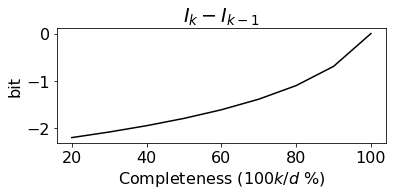

In [185]:
plt.figure(figsize=(6,3))
maxnum = 10
x = range(1,maxnum+1)
y = [math.log(math.factorial(maxnum-t)) for t in x]
y = np.diff(y)
plt.plot([100.0*t/len(x) for t in x[1:]],y,'k')
#plt.xlim((10,70))
plt.xlabel("Completeness ($100k/d$ %)")
plt.ylabel("bit")
plt.title("$I_{k}-I_{k-1}$")
plt.tight_layout()
plt.savefig("SRL_Ik_N%d.pdf" %(maxnum))
plt.show()

In [24]:
num_topo_all.shape

(300, 41)